In [1]:
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader
import torchinfo

from trainer import Trainer 
from tester import Tester
from utils import  visualize_data,show_misclassified_images,plot_class_distribution,plot_confusion_matrix,plot_curves
from dataloader import Cifar10DataLoader
from vistransformers import train_transforms,test_transforms
from model import Net,Network

In [3]:
torch.amp.autocast('cuda',dtype=torch.float64)
torch.set_float32_matmul_precision('medium')

In [4]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print("Is CUDA available? ", use_cuda)

Is CUDA available?  True


In [5]:
cifar10 = Cifar10DataLoader(is_cuda_available=use_cuda)

train_loader = cifar10.get_loader(transforms=train_transforms,train=True,download=True)
test_loader  = cifar10.get_loader(transforms=test_transforms,train=False,download=True) 

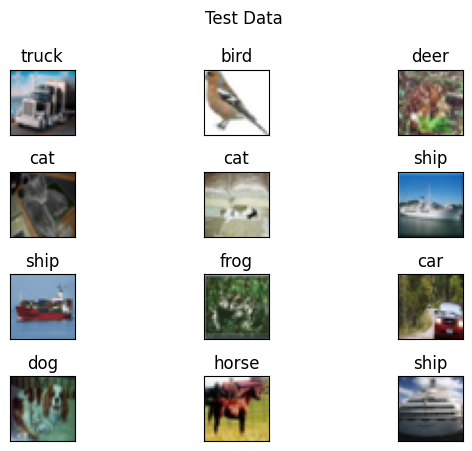

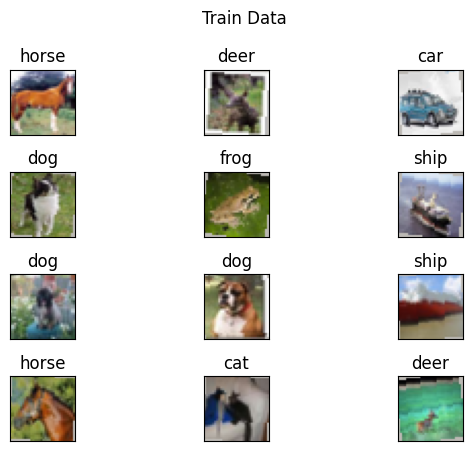

In [6]:
visualize_data(test_loader,12,"Test Data",classes=cifar10.classes)
visualize_data(train_loader,12,"Train Data",classes=cifar10.classes)

In [7]:
model = Network('group')
torchinfo.summary(model=model.cuda(),input_data=torch.ones((1,3,32,32)),device="cuda")

Layer (type:depth-idx)                   Output Shape              Param #
Network                                  [1, 10]                   --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 16, 32, 32]           432
│    └─ReLU: 2-2                         [1, 16, 32, 32]           --
│    └─GroupNorm: 2-3                    [1, 16, 32, 32]           32
│    └─Dropout2d: 2-4                    [1, 16, 32, 32]           --
│    └─Conv2d: 2-5                       [1, 16, 32, 32]           2,304
│    └─ReLU: 2-6                         [1, 16, 32, 32]           --
│    └─GroupNorm: 2-7                    [1, 16, 32, 32]           32
│    └─Dropout2d: 2-8                    [1, 16, 32, 32]           --
│    └─Conv2d: 2-9                       [1, 10, 32, 32]           160
├─MaxPool2d: 1-2                         [1, 10, 16, 16]           --
├─Sequential: 1-3                        [1, 16, 16, 16]           --
│    └─Con

EPOCH=1| LR=0.200000| LOSS=2.04| BATCH=390| ACCURACY=32.320: 100%|██████████| 391/391 [00:09<00:00, 39.33it/s]
LOSS=122.62| BATCH=78| ACCURACY=42.550: 100%|██████████| 79/79 [00:00<00:00, 103.80it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=2| LR=0.200000| LOSS=1.56| BATCH=390| ACCURACY=44.058: 100%|██████████| 391/391 [00:10<00:00, 38.75it/s]
LOSS=107.08| BATCH=78| ACCURACY=50.510: 100%|██████████| 79/79 [00:00<00:00, 103.88it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=3| LR=0.200000| LOSS=1.41| BATCH=390| ACCURACY=51.558: 100%|██████████| 391/391 [00:10<00:00, 39.09it/s]
LOSS=97.28| BATCH=78| ACCURACY=55.400: 100%|██████████| 79/79 [00:00<00:00, 103.42it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=4| LR=0.200000| LOSS=1.26| BATCH=390| ACCURACY=56.434: 100%|██████████| 391/391 [00:10<00:00, 38.72it/s]
LOSS=88.79| BATCH=78| ACCURACY=59.260: 100%|██████████| 79/79 [00:00<00:00, 100.94it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=5| LR=0.200000| LOSS=1.15| BATCH=390| ACCURACY=59.824: 100%|██████████| 391/391 [00:10<00:00, 38.64it/s]
LOSS=83.64| BATCH=78| ACCURACY=62.010: 100%|██████████| 79/79 [00:00<00:00, 102.15it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=6| LR=0.200000| LOSS=1.10| BATCH=390| ACCURACY=62.218: 100%|██████████| 391/391 [00:10<00:00, 38.21it/s]
LOSS=84.66| BATCH=78| ACCURACY=61.930: 100%|██████████| 79/79 [00:00<00:00, 103.38it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=7| LR=0.200000| LOSS=1.02| BATCH=390| ACCURACY=64.186: 100%|██████████| 391/391 [00:10<00:00, 38.05it/s]
LOSS=76.45| BATCH=78| ACCURACY=66.230: 100%|██████████| 79/79 [00:00<00:00, 102.73it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=8| LR=0.200000| LOSS=0.95| BATCH=390| ACCURACY=66.078: 100%|██████████| 391/391 [00:10<00:00, 38.32it/s]
LOSS=71.84| BATCH=78| ACCURACY=67.560: 100%|██████████| 79/79 [00:00<00:00, 100.27it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=9| LR=0.200000| LOSS=0.79| BATCH=390| ACCURACY=67.096: 100%|██████████| 391/391 [00:10<00:00, 37.93it/s]
LOSS=69.30| BATCH=78| ACCURACY=68.670: 100%|██████████| 79/79 [00:00<00:00, 102.34it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=10| LR=0.200000| LOSS=0.98| BATCH=390| ACCURACY=67.812: 100%|██████████| 391/391 [00:10<00:00, 37.39it/s]
LOSS=68.46| BATCH=78| ACCURACY=69.270: 100%|██████████| 79/79 [00:00<00:00, 102.07it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=11| LR=0.200000| LOSS=0.61| BATCH=390| ACCURACY=68.970: 100%|██████████| 391/391 [00:10<00:00, 38.02it/s]
LOSS=68.21| BATCH=78| ACCURACY=69.600: 100%|██████████| 79/79 [00:00<00:00, 99.12it/s] 


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=12| LR=0.200000| LOSS=0.85| BATCH=390| ACCURACY=69.506: 100%|██████████| 391/391 [00:10<00:00, 37.94it/s]
LOSS=67.36| BATCH=78| ACCURACY=69.850: 100%|██████████| 79/79 [00:00<00:00, 103.17it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=13| LR=0.200000| LOSS=0.69| BATCH=390| ACCURACY=70.104: 100%|██████████| 391/391 [00:10<00:00, 37.66it/s]
LOSS=65.73| BATCH=78| ACCURACY=70.250: 100%|██████████| 79/79 [00:00<00:00, 100.21it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=14| LR=0.200000| LOSS=0.84| BATCH=390| ACCURACY=71.080: 100%|██████████| 391/391 [00:10<00:00, 37.39it/s]
LOSS=65.76| BATCH=78| ACCURACY=70.640: 100%|██████████| 79/79 [00:00<00:00, 102.69it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=15| LR=0.200000| LOSS=1.01| BATCH=390| ACCURACY=71.596: 100%|██████████| 391/391 [00:10<00:00, 37.60it/s]
LOSS=60.45| BATCH=78| ACCURACY=72.900: 100%|██████████| 79/79 [00:00<00:00, 100.23it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=16| LR=0.200000| LOSS=0.70| BATCH=390| ACCURACY=72.150: 100%|██████████| 391/391 [00:10<00:00, 37.74it/s]
LOSS=68.12| BATCH=78| ACCURACY=70.690: 100%|██████████| 79/79 [00:00<00:00, 99.18it/s] 


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=17| LR=0.200000| LOSS=0.59| BATCH=390| ACCURACY=72.556: 100%|██████████| 391/391 [00:10<00:00, 37.71it/s]
LOSS=59.12| BATCH=78| ACCURACY=73.530: 100%|██████████| 79/79 [00:00<00:00, 101.03it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=18| LR=0.200000| LOSS=0.74| BATCH=390| ACCURACY=73.070: 100%|██████████| 391/391 [00:10<00:00, 37.87it/s]
LOSS=57.50| BATCH=78| ACCURACY=74.650: 100%|██████████| 79/79 [00:00<00:00, 100.20it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=19| LR=0.200000| LOSS=0.86| BATCH=390| ACCURACY=73.474: 100%|██████████| 391/391 [00:10<00:00, 37.61it/s]
LOSS=57.35| BATCH=78| ACCURACY=74.730: 100%|██████████| 79/79 [00:00<00:00, 102.25it/s]


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


EPOCH=20| LR=0.200000| LOSS=0.56| BATCH=390| ACCURACY=73.732: 100%|██████████| 391/391 [00:10<00:00, 37.92it/s]
LOSS=57.51| BATCH=78| ACCURACY=74.640: 100%|██████████| 79/79 [00:00<00:00, 100.74it/s]

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


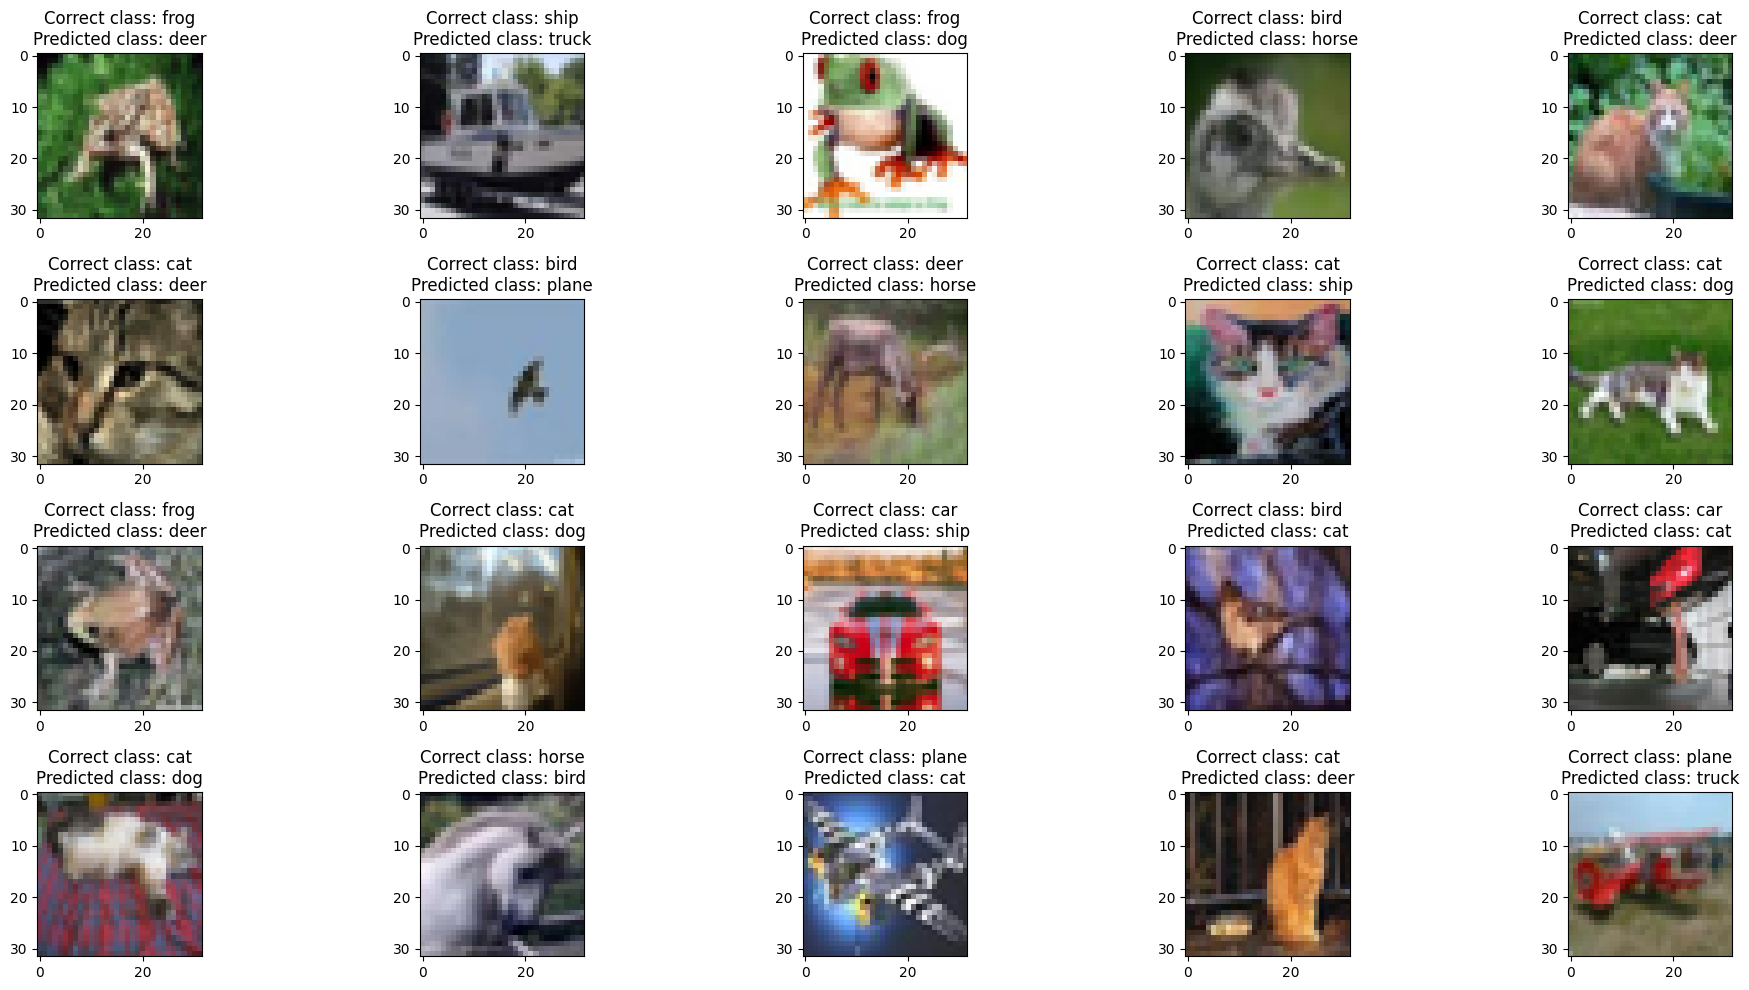

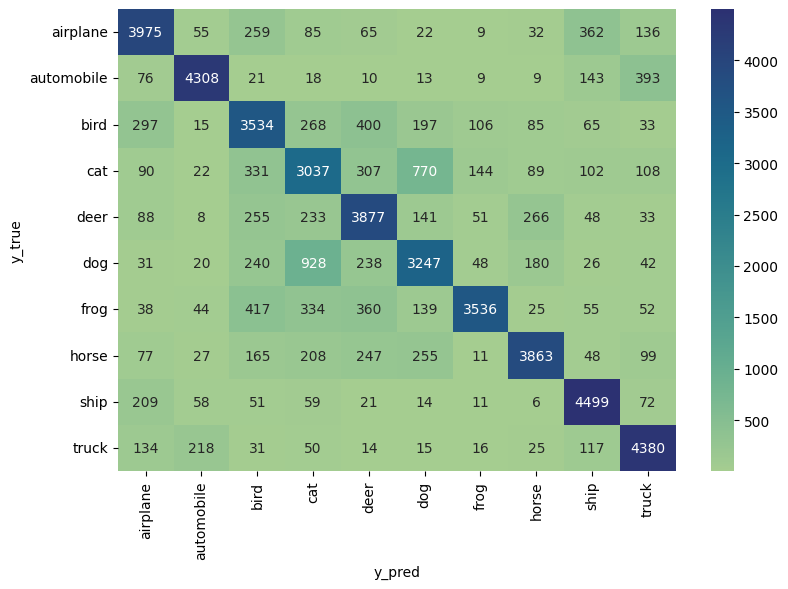

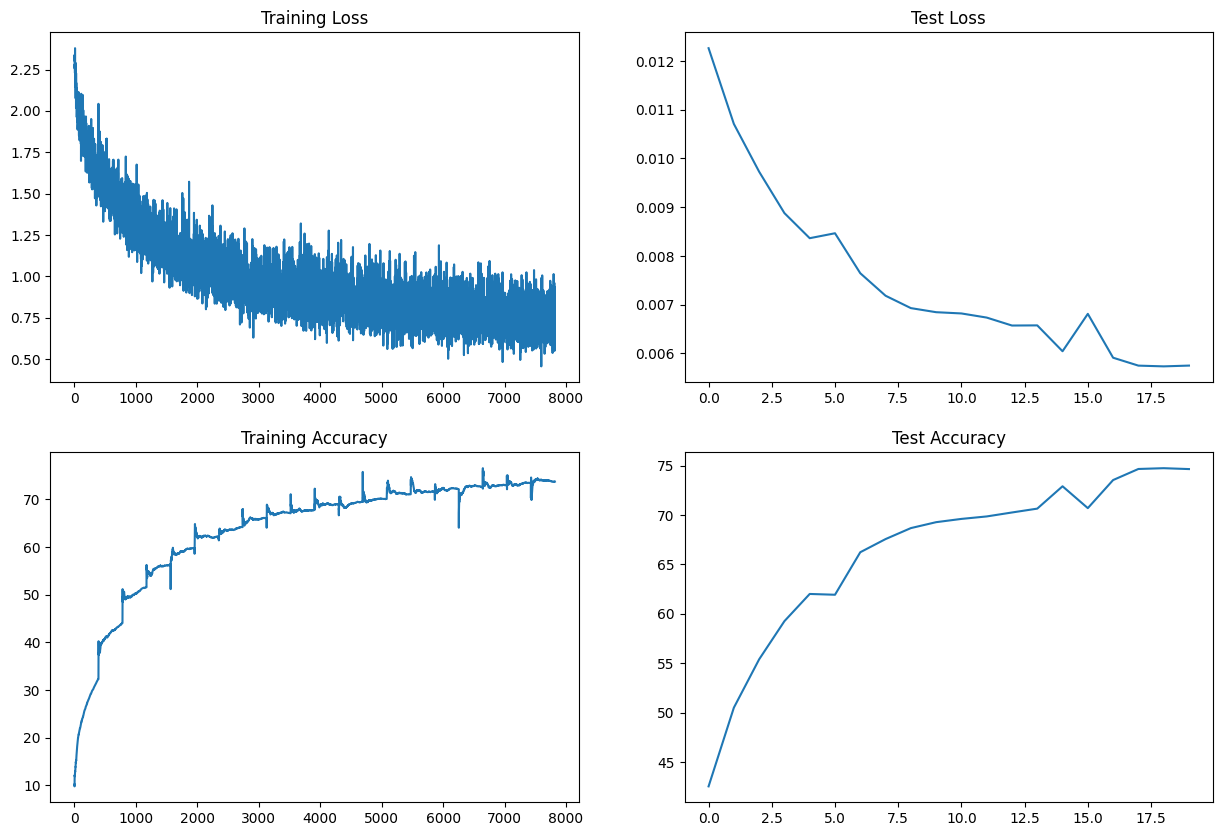

In [8]:
optimizer = optim.SGD(model.parameters(), lr=0.2, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,mode='min',factor=0.1,patience=5)
criterion = nn.NLLLoss()


trainer = Trainer(model, train_loader, optimizer, criterion, device)
tester = Tester(model, test_loader, criterion, device)

for epoch in range(1, 21):
    trainer.train(epoch=epoch)
    _,test_loss = tester.test()
    scheduler.step(test_loss)
    print('-'*200)


misclassified_images, predictions, labels = tester.get_misclassified_images()

show_misclassified_images(
    misclassified_images[:20],
    predictions[:20],
    labels[:20],
    cifar10.classes,
);

plot_confusion_matrix(model,train_loader,'cuda',train_loader.dataset.classes);

plot_curves(trainer.train_losses,trainer.train_accuracies,tester.test_losses,tester.test_accuracies);

In [ ]:
torch.save(model.state_dict(),'./data/BN/modelBN.pth')

In [ ]:
torch.save(optimizer.state_dict(),'./data/BN/optimBN.pth')